In [2]:
import dlsfunctions as dls
import initialization_data as init
import numpy as np
import matplotlib.pyplot as plt

In [3]:
time = init.get_log_time()
#time2 = init.get_lin_time()
d = init.get_distance()

gamma = init.get_gamma()

mean = init.get_right_mean()

sigma = init.get_normal_sigma()

m = init.m
c = init.c
beta = init.beta

f = dls.generate_distribution(d, mean, sigma, c)
noise = np.random.normal(mean, sigma, 200)*1e7

In [4]:
theta_input = np.append(f, beta)

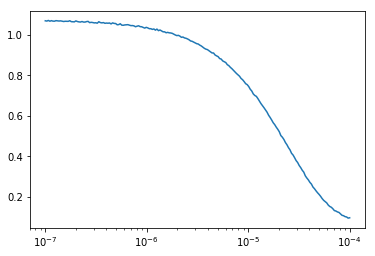

In [5]:
sim_data = dls.g2(theta_input, d, m, gamma, time) + noise
plt.semilogx(time, sim_data)


In [6]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [7]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.347, 0.333, 0.359, 0.322, 0.349, 0.366, 0.339, 0.346, 0.334,
       0.333, 0.321, 0.356, 0.371, 0.367, 0.376, 0.348, 0.381, 0.338,
       0.354, 0.327, 0.337, 0.352, 0.351, 0.345, 0.341, 0.333, 0.324,
       0.358, 0.355, 0.351, 0.338, 0.297, 0.377, 0.379, 0.348, 0.349,
       0.336, 0.316, 0.342, 0.295, 0.364, 0.328, 0.351, 0.345, 0.356,
       0.329, 0.314, 0.33 , 0.362, 0.34 , 0.334, 0.325, 0.336, 0.313,
       0.383, 0.343, 0.356, 0.344, 0.36 , 0.349, 0.358, 0.342, 0.33 ,
       0.337, 0.339, 0.341, 0.327, 0.325, 0.351, 0.316, 0.358, 0.356,
       0.342, 0.351, 0.337, 0.344, 0.325, 0.377, 0.332, 0.344, 0.298,
       0.337, 0.344, 0.341, 0.346, 0.327, 0.33 , 0.338, 0.354, 0.366,
       0.333, 0.351, 0.37 , 0.362, 0.333, 0.331, 0.341, 0.342, 0.34 ,
       0.339])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


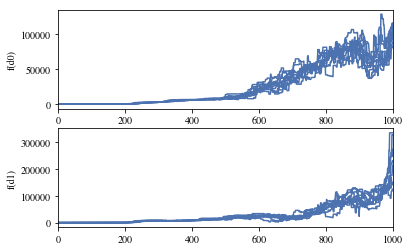

In [8]:
dls.view_burnin_plot(result, 0, 1)

In [9]:
chained_sampler = dls.chain(result, 850, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,74922.776598,96775.580447,100538.666696,36530.514929,13891.790709,9.385351e+07,1.836716e+09,6.929485e+07,10644.118801,21097.95331,23865.652036,26028.185224,67279.742293,36680.27069,32039.974635,16385.938036,26118.290577,99100.082908,47866.10522,10419.130757


In [10]:
infer = np.zeros(20)
infer[0] = 74922.776598
infer[1] = 96775.580447
infer[2] = 67279.742293
infer[3] = 36680.27069
infer[4] = 32039.974635
infer[5] = 16385.938036
infer[6] = 26118.290577
infer[7] = 99100.082908
infer[8] = 47866.10522
infer[9] = 10419.130757
infer[10] = 100538.666696
infer[11] = 36530.514929
infer[12] = 13891.790709
infer[13] = 9.385351e+07
infer[14] = 1.836716e+09
infer[15] = 6.929485e+07
infer[16] = 10644.118801
infer[17] = 21097.95331
infer[18] = 23865.652036
infer[19] = 26028.185224

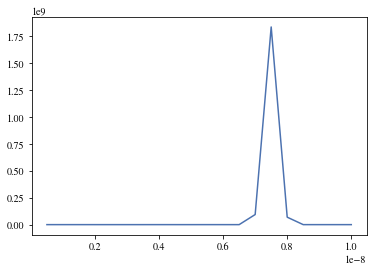

In [11]:
plt.plot(d, infer)

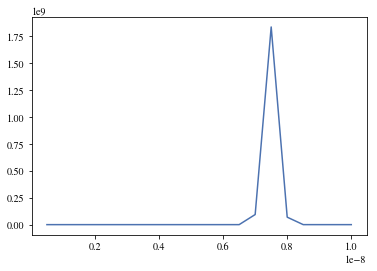

In [12]:
plt.plot(d, f)

In [13]:
beta_infer = dls.get_beta(chained_sampler, ndim)
beta_infer2 = beta_infer.quantile([0.5], axis=0).values.flatten()

In [14]:
beta_infer2

array([1.14183367])

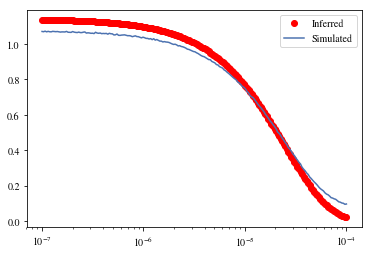

In [15]:
theta_infer = np.append(infer, beta_infer2)
g2_infer = dls.g2(theta_infer, d, m, gamma, time)
plt.semilogx(time, g2_infer, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='Simulated')
plt.legend()

(array([ 563.,  578.,  980., 1110., 2180., 3042., 2608., 1979., 1182.,
         778.]),
 array([1.07448131e-05, 1.99994629e-01, 3.99978513e-01, 5.99962397e-01,
        7.99946282e-01, 9.99930166e-01, 1.19991405e+00, 1.39989793e+00,
        1.59988182e+00, 1.79986570e+00, 1.99984959e+00]),
 <a list of 10 Patch objects>)

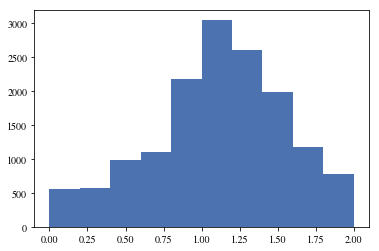

In [16]:
beta_posterior = beta_infer.values.flatten()
plt.hist(beta_posterior)